In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X=df.copy()
y=X.pop('target')

In [4]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'petal width')

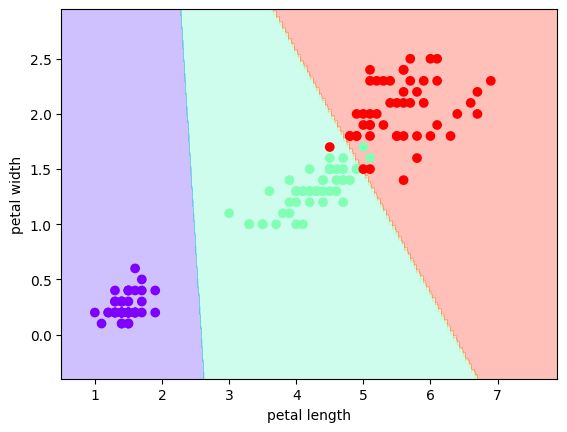

In [51]:
xx, yy = np.meshgrid(np.arange(X['petal length (cm)'].min()-0.5, X['petal length (cm)'].max()+1, 0.01),
                    np.arange(X['petal width (cm)'].min()-0.5, X['petal width (cm)'].max()+0.5, 0.05))


mean_sepal_length_col=np.tile(X['sepal length (cm)'].mean(), (len(xx.ravel()),1))
mean_sepal_width_col=np.tile(X['sepal width (cm)'].mean(), (len(xx.ravel()),1))

data=np.c_[mean_sepal_length_col, mean_sepal_width_col,xx.ravel(), yy.ravel()]

Z=clf.predict(data)
Z=Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X['petal length (cm)'],X['petal width (cm)'],c=y,cmap=plt.cm.rainbow)

plt.xlabel('petal length')
plt.ylabel('petal width')
